In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
    
]
raw_data_y = [ 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [27]:
X_train = np.array(raw_data_X)  #转成np.array类型
y_train = np.array(raw_data_y)

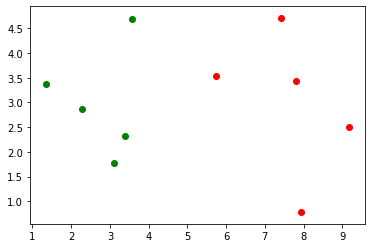

In [28]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color = 'g') 
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color = 'r') 
plt.show()

In [29]:
x = np.array([8.093607318, 3.365731514])

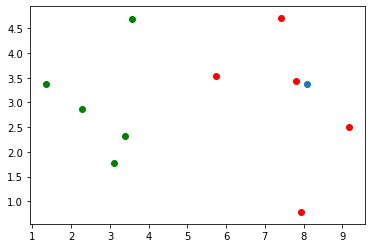

In [30]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color = 'g') 
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color = 'r') 
plt.scatter(x[0], x[1])
plt.show()

### knn的过程

In [39]:
from math import sqrt
distances = []
for x_train in X_train:
    # d = ((x[0] - x_train[0]) ** 2 + (x[1] - x_train[1])** 2) ** 1/2  是有问题的
    d = sqrt(np.sum((x_train - x) ** 2)) 
    distances.append(d)
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [35]:
#简化版，使用列表推导
distances = [sqrt(np.sum((x_train - x) **2)) for x_train in X_train]

In [36]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [37]:
nearset = np.argsort(distances)

In [46]:
k = 6
#前k个最小的距离的索引
#根据索引得到这些样本的标签
topK_y = [y_train[i] for i in nearset[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [47]:
#计算这些标签中数量最多的
from collections import Counter
votes = Counter(topK_y)  #Counter()
votes

Counter({1: 5, 0: 1})

In [43]:
votes.most_common(1)

[(1, 5)]

In [44]:
votes.most_common(1)[0]

(1, 5)

In [45]:
votes.most_common(1)[0][0]

1

In [48]:
predict_y = votes.most_common(1)[0][0]